In [42]:
from google.colab import drive 

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Text processing library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df_train = pd.read_csv('/content/drive/My Drive/train.txt', header =None, sep = ';', names = ['Input','Sentiment'], encoding = 'utf-8')
df_test = pd.read_csv('/content/drive/My Drive/test.txt', header = None, sep = ';', names = ['Input','Sentiment'], encoding = 'utf-8')
df_val = pd.read_csv('/content/drive/My Drive/val.txt', header=None, sep = ';', names = ['Input','Sentiment'] , encoding = 'utf-8')

In [5]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [7]:
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
df_train.shape

(16000, 2)

In [9]:
df_test.shape

(2000, 2)

In [10]:
df_val.shape

(2000, 2)

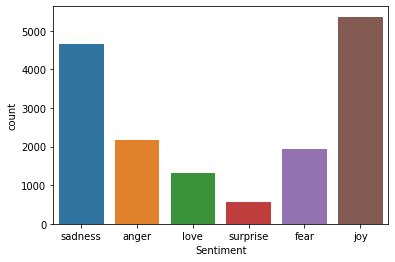

In [11]:
sns.countplot(df_train.Sentiment)
plt.show()

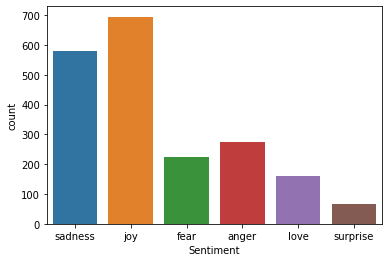

In [12]:
sns.countplot(df_test.Sentiment)
plt.show()

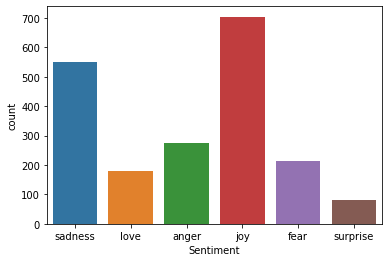

In [13]:
sns.countplot(df_val.Sentiment)
plt.show()

In [14]:
pip install text_hammer

     |████████████████████████████████| 122kB 5.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [15]:
import text_hammer as th

In [16]:
# These are series of preprocessing
df_train['Input'] = df_train['Input'].apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_emails(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_html_tags(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_urls(x))

df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_special_chars(x))
df_train['Input'] = df_train['Input'].apply(lambda x: th.remove_accented_chars(x))


In [17]:
df_train['Input'] = df_train['Input'].apply(lambda x: th.make_base(x)) #ran -> run

In [ ]:
#df_train['Input'][100:] = df_train['Input'][100:].apply(lambda x: th.make_base(x)) #ran -> run

In [18]:
# These are series of preprocessing
df_test['Input'] = df_test['Input'].apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_emails(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_html_tags(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_urls(x))

df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_special_chars(x))
df_test['Input'] = df_test['Input'].apply(lambda x: th.remove_accented_chars(x))

In [19]:
df_test['Input'] = df_test['Input'].apply(lambda x: th.make_base(x)) #ran -> run

In [20]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Sentiment']=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Sentiment']=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [21]:
df_train.head()

,Input,Sentiment
0,i do not feel humiliate,3
1,i can go from feel so hopeless to so damned ho...,3
2,i m grab a minute to post i feel greedy wrong,1
3,i am ever feel nostalgic about the fireplace i...,2
4,i am feel grouchy,1


In [22]:
df_test.head()

,Input,Sentiment
0,i m feeling rather rotten so i m not very ambi...,3
1,i m update my blog because i feel shitty,3
2,i never make her separate from me because i do...,3
3,i leave with my bouquet of red and yellow tuli...,0
4,i was feel a little vain when i do this one,3


In [23]:
from keras.preprocessing.text import Tokenizer

In [24]:
num_words = 5000 
tokenizer = Tokenizer( num_words , lower=True )
df_total = pd.concat([df_train['Input'], df_test['Input']], axis = 0)
tokenizer.fit_on_texts(df_total)

In [25]:
X_train = tokenizer.texts_to_sequences(df_train['Input'])
X_test = tokenizer.texts_to_sequences(df_test['Input'])
X_val = tokenizer.texts_to_sequences(df_val['Input'])

In [26]:
from keras.preprocessing.sequence import pad_sequences
max_pad = 100
X_train_pad = pad_sequences(X_train , maxlen = 100, padding = 'post')

X_test_pad = pad_sequences(X_test, maxlen = 100, padding = 'post')

X_val_pad = pad_sequences(X_val, maxlen = 100, padding = 'post')

In [27]:
print(X_train_pad.shape, X_val_pad.shape, X_test_pad.shape)

(16000, 100) (2000, 100) (2000, 100)


In [28]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(df_train.Sentiment.values)
y_test = to_categorical(df_test.Sentiment.values)
y_val = to_categorical(df_val.Sentiment.values)

In [29]:
print(y_train.shape,y_test.shape, y_val.shape)

(16000, 6) (2000, 6) (2000, 6)


In [30]:
y_train[0]

array([0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
#from tensorflow.keras.layers import Embedding,LSTM,Dense
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense , Bidirectional
from keras.layers.embeddings import Embedding
import keras.backend as K

In [32]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 32 dimension
model = Sequential()
model.add(Embedding(num_words , EMBEDDING_DIM,  input_length = 100))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          500000    
_________________________________________________________________
bidirectional (Bidirectional (None, 400)               481600    
_________________________________________________________________
dense (Dense)                (None, 6)                 2406      
Total params: 984,006
Trainable params: 984,006
Non-trainable params: 0
_________________________________________________________________


In [34]:
X_train_pad.shape

(16000, 100)

In [35]:
y_train.shape

(16000, 6)

In [37]:
model.fit(X_train_pad , y_train , batch_size = 128 , epochs = 10 , verbose = 2 , validation_data = (X_val_pad, y_val))

Epoch 1/10
125/125 - 140s - loss: 0.0726 - accuracy: 0.9733 - val_loss: 0.4247 - val_accuracy: 0.8875
Epoch 2/10
125/125 - 141s - loss: 0.0655 - accuracy: 0.9774 - val_loss: 0.3860 - val_accuracy: 0.8845
Epoch 3/10
125/125 - 142s - loss: 0.0610 - accuracy: 0.9783 - val_loss: 0.4560 - val_accuracy: 0.8745
Epoch 4/10
125/125 - 143s - loss: 0.0579 - accuracy: 0.9793 - val_loss: 0.4364 - val_accuracy: 0.8845
Epoch 5/10
125/125 - 143s - loss: 0.0499 - accuracy: 0.9811 - val_loss: 0.4443 - val_accuracy: 0.8840
Epoch 6/10
125/125 - 144s - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.4536 - val_accuracy: 0.8820
Epoch 7/10
125/125 - 144s - loss: 0.0345 - accuracy: 0.9879 - val_loss: 0.5226 - val_accuracy: 0.8760
Epoch 8/10
125/125 - 144s - loss: 0.0414 - accuracy: 0.9859 - val_loss: 0.5489 - val_accuracy: 0.8735
Epoch 9/10
125/125 - 147s - loss: 0.0417 - accuracy: 0.9842 - val_loss: 0.4739 - val_accuracy: 0.8805
Epoch 10/10
125/125 - 142s - loss: 0.0341 - accuracy: 0.9881 - val_loss: 0.4991 - 

In [38]:
model.evaluate(X_test_pad, y_test) 

63/63 [==============================] - 7s 118ms/step - loss: 0.4739 - accuracy: 0.8890


[0.47388651967048645, 0.8889999985694885]

In [39]:
y_pred =   np.argmax(model.predict(X_test_pad), axis  =  1)

In [40]:
y_true = np.argmax(y_test, axis = 1)

In [41]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       697
           1       0.85      0.89      0.87       263
           2       0.74      0.73      0.73       161
           3       0.94      0.92      0.93       598
           4       0.83      0.92      0.87       204
           5       0.77      0.66      0.71        77

    accuracy                           0.89      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.89      0.89      0.89      2000



In [49]:
model.save("/content/drive/My Drive/Emotion_Detection.h5")

In [43]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key


In [44]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=300,padding='post')
    ans=get_key(model.predict_classes(sentence_padded))
    print("The emotion predicted is",ans)

In [45]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : i love food
The emotion predicted is love


In [46]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : i hate you
The emotion predicted is anger


In [47]:
pip freeze > requirements.txt

In [48]:
cat requirements.txt

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.9.1
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
cftime==1.5.0
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.